In [61]:
from pandas import read_csv

#plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style='white')

In [62]:
data = read_csv(r'Aws_store_cleaned_data.csv', parse_dates = ['CartViewed',
                                    'CheckoutStarted', 'OrderCompleted', 
                                    'ProductAdded', 'ProductViewed'])
data.head(2)

,item_id,user_id,discount,CartViewed,CheckoutStarted,OrderCompleted,ProductAdded,ProductViewed,product_name,category,...,age,gender,address1,country,city,state_x,zipcode,zcta,state_y,status
0,00096972-5f6b-44df-917b-f7d21ae5644c,229,Yes,NaT,NaT,NaT,NaT,2020-06-18 19:54:27,Pink Shirt,apparel,...,52,F,1620 Kaitlin Drive Apt. 106,US,New Alicia,MA,1287,NaN,NaN,upper
1,00096972-5f6b-44df-917b-f7d21ae5644c,417,No,NaT,NaT,NaT,NaT,2020-06-17 00:49:00,Pink Shirt,apparel,...,28,F,224 Huber Plains Apt. 687,US,Meganfort,WI,53601,NaN,NaN,middle


In [63]:
buyers = data[data['OrderCompleted'].notna()]

##### **Gender and Age**

Text(0.5, 0, 'Age')

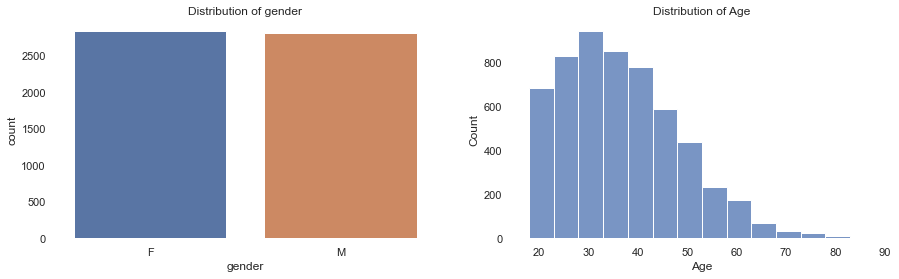

In [64]:
#Gender and Age distribution
fig, axs = plt.subplots(1, 2, figsize=(15, 4), facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
sns.countplot(x='gender', data= buyers)
plt.title('Distribution of gender')
sns.despine(bottom = True, left = True)

plt.subplot(1,2,2)
sns.histplot(buyers, x='age', binwidth= 5)
plt.title('Distribution of Age')
plt.xlabel('Age')

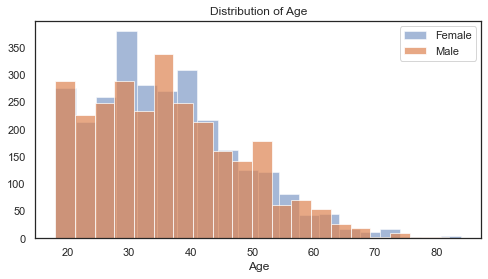

In [65]:
plt.figure(figsize=(8,4))
plt.hist(data =buyers[buyers['gender'] == 'F'], x='age', alpha= 0.5, label='Female', bins=20)
plt.hist(data =buyers[buyers['gender'] == 'M'], x='age', alpha= 0.7, label='Male', bins=20)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.legend()


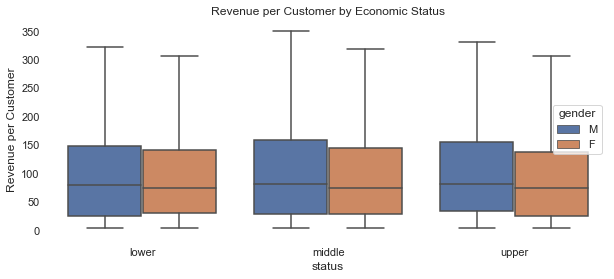

In [82]:
buyers_gpd = buyers.groupby(['user_id', 'gender', 'status', 'category'], as_index= False).price.sum()

plt.figure(figsize=(10,4))
sns.boxplot(x='status', y= 'price', hue="gender",
            data= buyers_gpd, showfliers= False, order=['lower', 'middle', 'upper'])
plt.ylabel('Revenue per Customer')
plt.title('Revenue per Customer by Economic Status')
sns.despine(bottom = True, left = True)

In [84]:
buyers_gpd

,user_id,gender,status,category,price
0,1,M,middle,furniture,165.99
1,2,F,lower,housewares,57.99
2,3,M,lower,floral,147.99
3,4,M,middle,apparel,10.99
4,5,M,upper,instruments,717.98
...,...,...,...,...,...
4972,5996,M,lower,jewelry,193.99
4973,5997,M,upper,homedecor,20.99
4974,5998,M,lower,footwear,70.99
4975,6000,F,lower,homedecor,31.99


Male customers generate lower revenue in all economic groups.

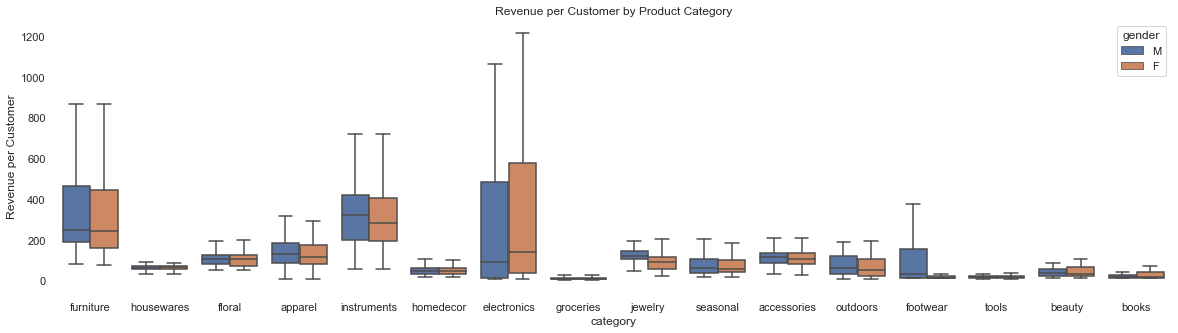

In [89]:
plt.figure(figsize=(20,5))
sns.boxplot(x='category', y= 'price', hue="gender",
            data= buyers_gpd, showfliers= False)
plt.ylabel('Revenue per Customer')
plt.title('Revenue per Customer by Product Category')
sns.despine(bottom = True, left = True)

In [79]:
buyers_gpd.sort_values(by='price', ascending= False)

,user_id,gender,status,price
3335,4582,F,lower,2035.97
4185,5790,F,middle,2020.98
3957,5494,F,middle,1946.98
373,518,M,middle,1946.98
336,465,F,upper,1868.98
...,...,...,...,...
772,1062,M,upper,2.99
771,1062,M,lower,2.99
2405,3305,M,lower,2.99
2679,3691,M,upper,2.99
